In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("articulos_ml.csv")
data.shape

(161, 8)

In [4]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


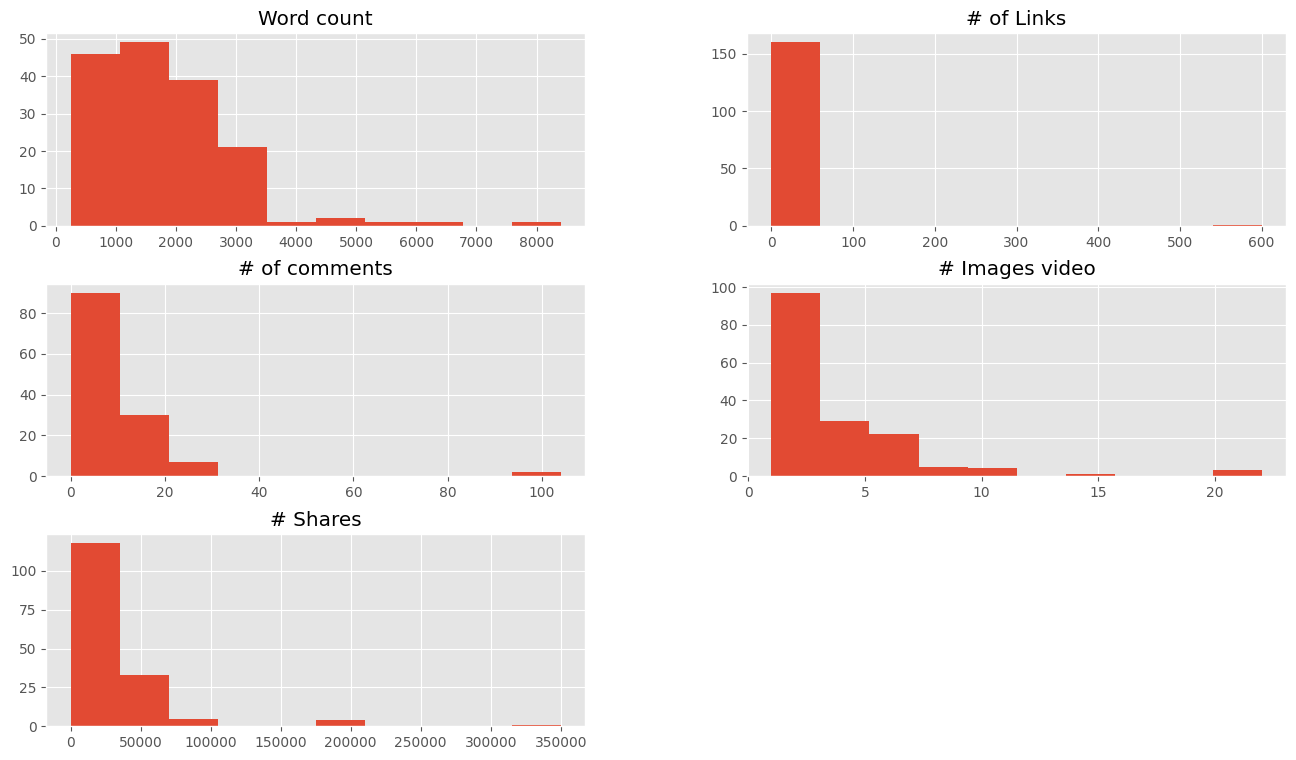

In [9]:
data.drop(['Title', 'url', 'Elapsed days'], axis = 1).hist()
plt.show()

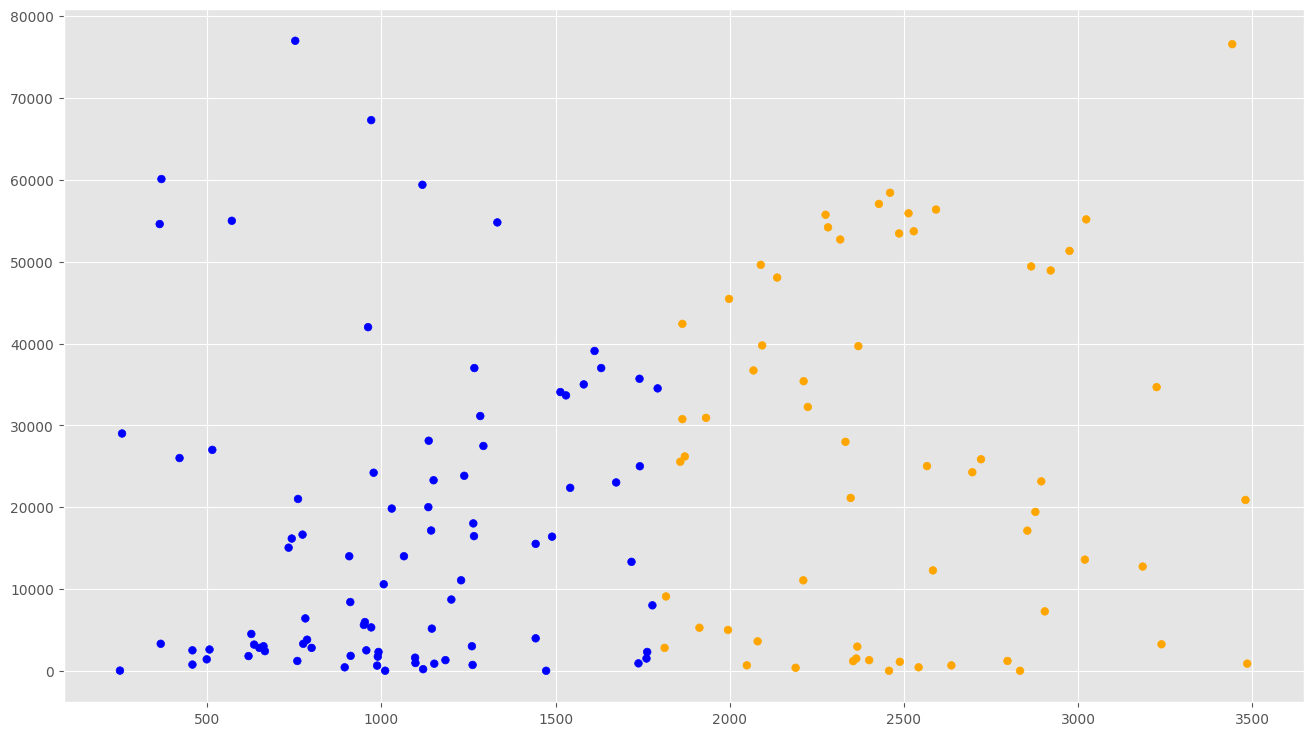

In [11]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

asignar = []
for index, row in filtered_data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [12]:
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


In [13]:
suma = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

regr2 = linear_model.LinearRegression()

regr2.fit(XY_train, z_train)
z_pred = regr2.predict(XY_train)

print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


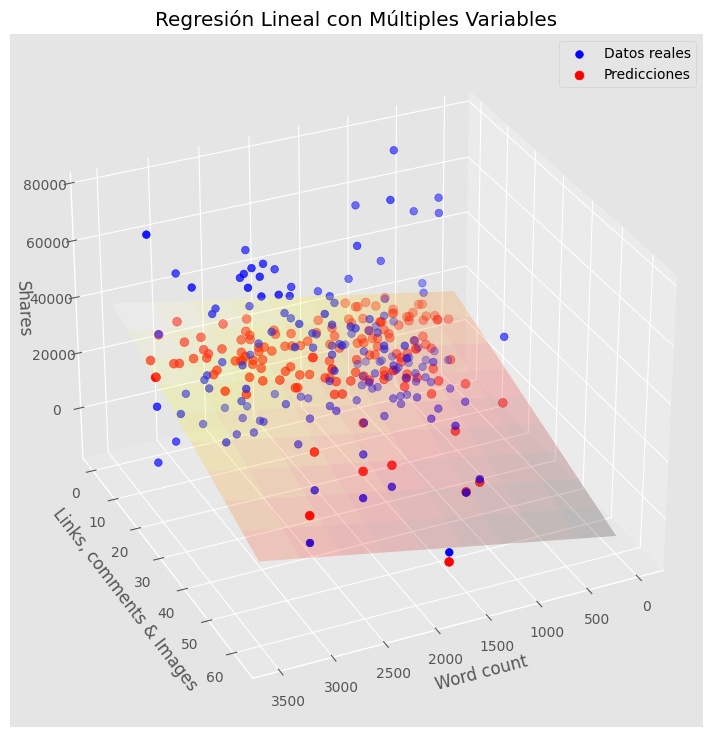

In [ ]:
# Crear la figura y el eje 3D352122816.48
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Usar add_subplot para crear el eje 3D

# Crear una malla para las variables independientes
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# Calcular la superficie de predicción
nuevoX = regr2.coef_[0] * xx
nuevoY = regr2.coef_[1] * yy
z = nuevoX + nuevoY + regr2.intercept_  # Ecuación del plano de regresión

# Graficar la superficie de regresión
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficar los puntos de entrenamiento
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30, label='Datos reales')

# Graficar las predicciones del modelo
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40, label='Predicciones')

# Configurar la vista de la gráfica
ax.view_init(elev=30., azim=65)

# Etiquetas y título
ax.set_xlabel('Word count')
ax.set_ylabel('Links, comments & Images')
ax.set_zlabel('Shares')
ax.set_title('Regresión Lineal con Múltiples Variables')

# Mostrar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()